In [1]:
#TJ import needed functions
if __name__ == "__main__":
    from astropy.table import Table
    from astropy.utils.data import get_pkg_data_filename
    import matplotlib.pyplot as plt
    from time import sleep
    import os
    import glob
    import numpy as np

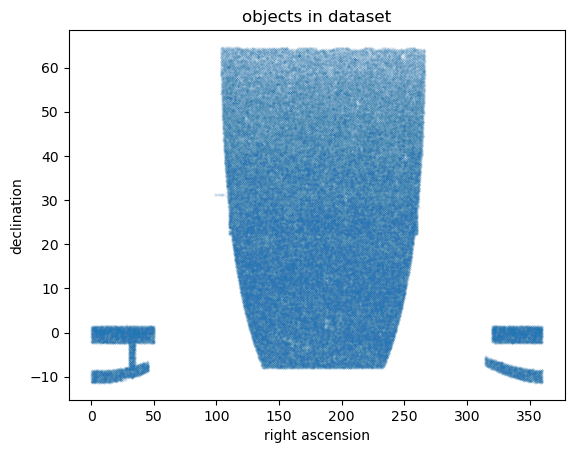

In [2]:
#Python task #1 read in data and plot locations
if __name__ == "__main__":
    chandra_events = get_pkg_data_filename('/d/scratch/ASTR5160/data/first/first_08jul16.fits')
    t_task1 = Table.read(chandra_events)
    ra, dec = t_task1['RA'], t_task1['DEC']
    plt.scatter(ra,dec, s=0.001, marker = '.') #TJ scatter plot, very small size to see density better
    plt.title('objects in dataset')
    plt.xlabel('right ascension')
    plt.ylabel('declination')
    plt.show()

In [3]:
#Python task #2 try the module included in the class notes
if __name__ == "__main__":
    ra = 145.285854
    dec = 34.741254
    open("testing_sql_query.txt", "w").close()
    os.system("python sdssDR9query.py 145.285854 34.741254 >> testing_sql_query.txt")
    #TJ should return 145.28585385,34.74125418,21.132605,20.059248,19.613457,19.379345,19.423323,7.7489487E-4
    print('done')
    sleep(1)
    print('trying second location')
    ra = 300.011
    dec = -1
    os.system(f"python sdssDR9query.py {ra} {dec} >> testing_sql_query.txt")
    print('done')

done
trying second location
done


In [ ]:
#python task #3 run this query on first 100 datapoints
def query_n_objects(num_objects, dataset_file, new_file, start = 0, wipe = False):
    '''run sdss query for objects near ra and dec of n = num_objects objects from provided dataset, 

    imports all needed packages automatically
    -------------


    Parameters
    -------------
    num_objects :  type = int - integer number of objects that you want to query
    dataset_file :  type = str - string representing the directory to the .fits file that contains the ra and dec of objects we want to query
    new_file : type = str - string representing the .txt file to write output to. !!file name must have .txt extension!!
    start (optional, defaults to 0) : type = int - specifies the start index in the dataset to start the query. 
                                    This allows user to specify num_objects = 1, and start = i, to query just the i'th entry in the file
    wipe (optional, defaults to False) : specify whether or not to append the .txt file with the new query, or wipe the .txt file before writing to it.
                        
                        
    
    Returns
    -------------
    Nothing. But creates/appends to a {new_file.txt} file in the working directory'''
    from astropy.table import Table
    from astropy.utils.data import get_pkg_data_filename
    from time import sleep
    import os
    dataset = get_pkg_data_filename(dataset_file)
    t = Table.read(dataset)
    if wipe == True:
        open("testing_sql_query.txt", "w").close()
    for i in range(start,num_objects):
        ra, dec = t['RA'][i], t['DEC'][i]
        print(f'querying object {i+1}')
        os.system(f"python sdssDR9query.py {ra} {dec} >> {new_file}")


    
    return None
if __name__ == "__main__":
    file_location = '/d/scratch/ASTR5160/data/first/first_08jul16.fits'
    new_file = 'Class16_query.txt'
    query_n_objects(100, file_location, new_file, start = 0, wipe = True)

querying object 1
querying object 2
querying object 3
querying object 4
querying object 5
querying object 6
querying object 7
querying object 8
querying object 9
querying object 10
querying object 11
querying object 12
querying object 13
querying object 14
querying object 15
querying object 16
querying object 17
querying object 18
querying object 19
querying object 20
querying object 21
querying object 22
querying object 23
querying object 24
querying object 25
querying object 26
querying object 27
querying object 28
querying object 29
querying object 30
querying object 31
querying object 32
querying object 33
querying object 34
querying object 35
querying object 36
querying object 37
querying object 38
querying object 39
querying object 40
querying object 41
querying object 42
querying object 43
querying object 44
querying object 45
querying object 46
querying object 47
querying object 48
querying object 49
querying object 50
querying object 51
querying object 52
querying object 53
qu

Traceback (most recent call last):
  File "/d/ret1/Taylor/jupyter_notebooks/sdssDR9query.py", line 90, in <module>
    sleep(1)
KeyboardInterrupt


querying object 64
querying object 65


In [ ]:
#python task #4 and #5 take a look at a couple of sweep files
if __name__ == "__main__":
    file_1 = get_pkg_data_filename('/d/scratch/ASTR5160/data/legacysurvey/dr9/north/sweep/9.0/sweep-150p030-160p035.fits')
    t = Table.read(file_1)
    new_file = 'Class16_query.txt'
    query_n_objects(10, file_location, new_file, start = 0, wipe = True)
    file_2 = get_pkg_data_filename('/d/scratch/ASTR5160/data/legacysurvey/dr9/north/sweep/9.0/sweep-230p025-240p030.fits')
    new_file = 'Class16_query.txt'
    query_n_objects(10, file_location, new_file, start = 0, wipe = False)

In [ ]:
#python task #6 find which files have which RA and dec locations
def is_in_box(objs, radecbox):
    """Determine which of an array of objects are inside an RA, Dec box.

    Parameters
    ----------
    objs : :class:`~numpy.ndarray`
        An array of objects. Must include at least the columns "RA" and "DEC", or be a single object that is just a two element list [ra, dec]
    radecbox : :class:`list`
        4-entry list of coordinates [ramin, ramax, decmin, decmax] forming the
        edges of a box in RA/Dec (degrees).

    Returns
    -------
    :class:`~numpy.ndarray`
        ``True`` for objects in the box, ``False`` for objects outside of the box.

    Notes
    -----
        - Tests the minimum RA/Dec with >= and the maximum with <
    """

    ramin, ramax, decmin, decmax = radecbox

    # ADM check for some common mistakes.
    if decmin < -90. or decmax > 90. or decmax <= decmin or ramax <= ramin:
        msg = "Strange input: [ramin, ramax, decmin, decmax] = {}".format(radecbox)
        log.critical(msg)
        raise ValueError(msg)

    if type(objs) == list and len(objs) == 2: #TJ allow function to be called on a single object
        ra, dec = objs
        ii = (ra >= ramin) & (ra < ramax) & (dec >= decmin) & (dec < decmax)

    else: #TJ otherwise, treat as an array of objects
        ii = ((objs["RA"] >= ramin) & (objs["RA"] < ramax)
              & (objs["DEC"] >= decmin) & (objs["DEC"] < decmax))

    return ii #TJ return true or false array

def decode_sweep_name(sweepname, nside=None, inclusive=True, fact=4):
    """Retrieve RA/Dec edges from a full directory path to a sweep file

    Parameters
    ----------
    sweepname : :class:`str`
        Full path to a sweep file, e.g., /a/b/c/sweep-350m005-360p005.fits
    nside : :class:`int`, optional, defaults to None
        (NESTED) HEALPixel nside
    inclusive : :class:`book`, optional, defaults to ``True``
        see documentation for `healpy.query_polygon()`
    fact : :class:`int`, optional defaults to 4
        see documentation for `healpy.query_polygon()`

    Returns
    -------
    :class:`list` (if nside is None)
        A 4-entry list of the edges of the region covered by the sweeps file
        in the form [RAmin, RAmax, DECmin, DECmax]
        For the above example this would be [350., 360., -5., 5.]
    :class:`list` (if nside is not None)
        A list of HEALPixels that touch the  files at the passed `nside`
        For the above example this would be [16, 17, 18, 19]
    """
    # ADM extract just the file part of the name.
    sweepname = os.path.basename(sweepname)

    # ADM the RA/Dec edges.
    ramin, ramax = float(sweepname[6:9]), float(sweepname[14:17])
    decmin, decmax = float(sweepname[10:13]), float(sweepname[18:21])

    # ADM flip the signs on the DECs, if needed.
    if sweepname[9] == 'm':
        decmin *= -1
    if sweepname[17] == 'm':
        decmax *= -1

    if nside is None:
        return [ramin, ramax, decmin, decmax]

    pixnum = hp_in_box(nside, [ramin, ramax, decmin, decmax],
                       inclusive=inclusive, fact=fact)

    return pixnum


def search_directory_for_location(directory, objects_list):
    '''searches a directory with multiple .fits files and returns which file(s) contain at least one of your supplied objects

    imports all needed packages automatically
    -------------


    Parameters
    -------------
    directory :  type = str - string representing a directory to search, this directory should contain at least 1 .fits file
    ra :  type = float - right ascension of desired object in degrees
    dec : type = float - declination of desired object in degrees
                        
    
    Returns
    -------------
    list of file names in directory, each of these files have objects that have BOTH larger and smaller ra's AND dec's'''
    import os
    import glob
    import numpy as np
    fits_files = sorted(glob.glob(os.path.join(directory, "*.fits"))) #TJ find only fits files in directory
    boxes = [decode_sweep_name(file) for file in fits_files] #TJ extract boxes that each fits file contains
    all_files = np.atleast_2d([is_in_box(objects_list, box) for box in boxes])
    #TJ for whether or not that object is in that file's box. An array of all Falses would mean no objects are in that file's box
    needed_indices = np.where(all_files.any(axis=1))[0] #TJ this grabs the indices corresponding to all the sublists where at least one True exists
    needed_files = [fits_files[i] for i in needed_indices] #TJ this uses those indices to grab just the files where at least one object is inside
    
    return needed_files

if __name__ == "__main__":
    directory = '/d/scratch/ASTR5160/data/legacysurvey/dr9/north/sweep/9.0/'
    need_files = search_directory_for_location(directory, t_task1[0:100]) #TJ perform this function on only the first 100 objects in the FIRST file
    print(len(need_files)) #TJ check that this is indeed 11
    need_files #TJ show all the files I would need